In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
tav = pd.read_csv("TAVHL.csv", parse_dates=["Tarih"], dayfirst=True)
df=pd.DataFrame(tav)
df=df.iloc[::-1]


In [66]:
df.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
684,2021-01-04,"21,12","21,48","21,52","21,08","6,01M","-0,85%"
683,2021-01-05,"21,00","20,98","21,26","20,62","8,72M","-0,57%"
682,2021-01-06,"20,88","21,14","21,18","20,78","5,47M","-0,57%"
681,2021-01-07,"20,88","20,96","21,10","20,72","7,39M","0,00%"
680,2021-01-08,"21,30","20,96","21,60","20,92","13,12M","2,01%"


In [67]:
df.rename(columns = {'Şimdi':'Kapanış'}, inplace = True)

In [68]:
df.head()

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %
684,2021-01-04,"21,12","21,48","21,52","21,08","6,01M","-0,85%"
683,2021-01-05,"21,00","20,98","21,26","20,62","8,72M","-0,57%"
682,2021-01-06,"20,88","21,14","21,18","20,78","5,47M","-0,57%"
681,2021-01-07,"20,88","20,96","21,10","20,72","7,39M","0,00%"
680,2021-01-08,"21,30","20,96","21,60","20,92","13,12M","2,01%"


In [69]:
df.set_index("Tarih")

,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %
Tarih,,,,,,
2021-01-04,"21,12","21,48","21,52","21,08","6,01M","-0,85%"
2021-01-05,"21,00","20,98","21,26","20,62","8,72M","-0,57%"
2021-01-06,"20,88","21,14","21,18","20,78","5,47M","-0,57%"
2021-01-07,"20,88","20,96","21,10","20,72","7,39M","0,00%"
2021-01-08,"21,30","20,96","21,60","20,92","13,12M","2,01%"
...,...,...,...,...,...,...
2023-09-25,"123,10","119,30","124,30","117,10","9,17M","3,27%"
2023-09-26,"122,00","123,90","124,90","121,00","6,67M","-0,89%"
2023-09-27,"121,50","123,50","125,20","121,10","5,74M","-0,41%"


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 684 to 0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tarih    685 non-null    datetime64[ns]
 1   Kapanış  685 non-null    object        
 2   Açılış   685 non-null    object        
 3   Yüksek   685 non-null    object        
 4   Düşük    685 non-null    object        
 5   Hac.     685 non-null    object        
 6   Fark %   685 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 37.6+ KB


In [71]:
df["Kapanış"]=df["Kapanış"].str.replace(",",".")
df["Kapanış"]=df["Kapanış"].astype(float)
df["Yüksek"]=df["Yüksek"].str.replace(",",".")
df["Yüksek"]=df["Yüksek"].astype(float)
df["Açılış"]=df["Açılış"].str.replace(",",".")
df["Açılış"]=df["Açılış"].astype(float)
df["Düşük"]=df["Düşük"].str.replace(",",".")
df["Düşük"]=df["Düşük"].astype(float)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 684 to 0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tarih    685 non-null    datetime64[ns]
 1   Kapanış  685 non-null    float64       
 2   Açılış   685 non-null    float64       
 3   Yüksek   685 non-null    float64       
 4   Düşük    685 non-null    float64       
 5   Hac.     685 non-null    object        
 6   Fark %   685 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 37.6+ KB


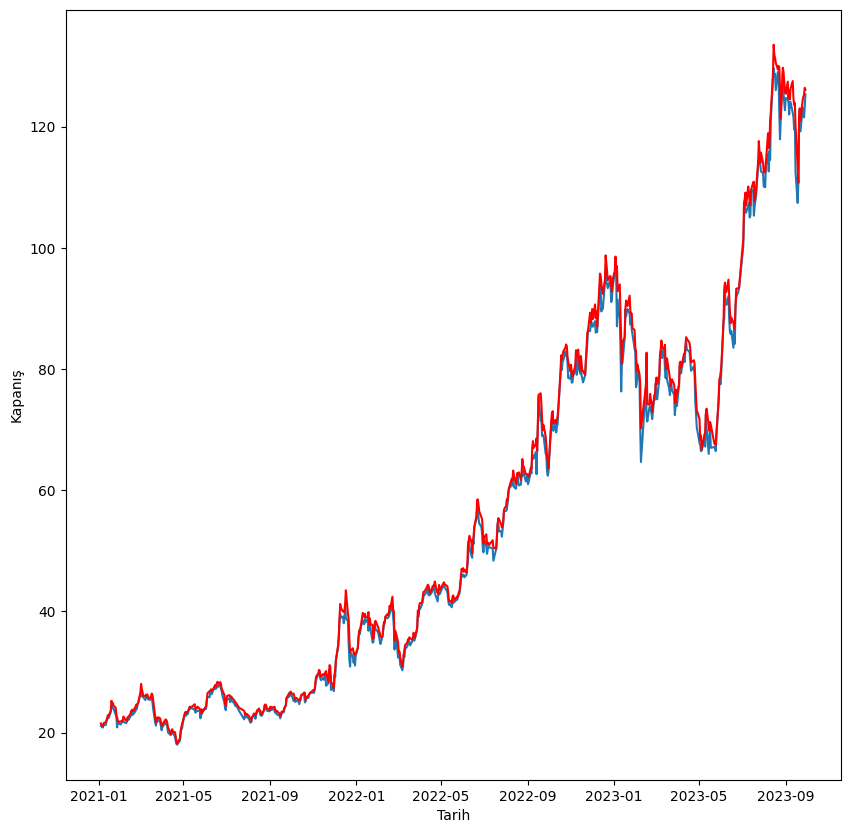

In [73]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df["Tarih"],y=df["Kapanış"])
sns.lineplot(x=df["Tarih"],y=df["Yüksek"],color="red")
plt.show()


## Yarının Kapanış Fiyatını DF'ye eklemek

In [74]:
df["Yarın_Kapanış_Fiyat"]=df["Kapanış"].shift(-1)

In [75]:
df.head()

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat
684,2021-01-04,21.12,21.48,21.52,21.08,"6,01M","-0,85%",21.00
683,2021-01-05,21.00,20.98,21.26,20.62,"8,72M","-0,57%",20.88
682,2021-01-06,20.88,21.14,21.18,20.78,"5,47M","-0,57%",20.88
681,2021-01-07,20.88,20.96,21.10,20.72,"7,39M","0,00%",21.30
680,2021-01-08,21.30,20.96,21.60,20.92,"13,12M","2,01%",21.28


## 1 Gündeki Fiyat Değişikliği(Bugün-Yarın)

In [76]:
df["Değişim"]=df["Yarın_Kapanış_Fiyat"]-df["Kapanış"]

In [77]:
df.head()

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim
684,2021-01-04,21.12,21.48,21.52,21.08,"6,01M","-0,85%",21.00,-0.12
683,2021-01-05,21.00,20.98,21.26,20.62,"8,72M","-0,57%",20.88,-0.12
682,2021-01-06,20.88,21.14,21.18,20.78,"5,47M","-0,57%",20.88,0.00
681,2021-01-07,20.88,20.96,21.10,20.72,"7,39M","0,00%",21.30,0.42
680,2021-01-08,21.30,20.96,21.60,20.92,"13,12M","2,01%",21.28,-0.02


## Günlük Getiri Kolonu Eklemek

günlük getiri=Değişim/Kapanış

In [81]:
df["Günlük_Getiri"]=df["Değişim"]/df["Kapanış"]

In [89]:
df.head(5)

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri
684,2021-01-04,21.12,21.48,21.52,21.08,"6,01M","-0,85%",21.00,-0.12,-0.005682
683,2021-01-05,21.00,20.98,21.26,20.62,"8,72M","-0,57%",20.88,-0.12,-0.005714
682,2021-01-06,20.88,21.14,21.18,20.78,"5,47M","-0,57%",20.88,0.00,0.000000
681,2021-01-07,20.88,20.96,21.10,20.72,"7,39M","0,00%",21.30,0.42,0.020115
680,2021-01-08,21.30,20.96,21.60,20.92,"13,12M","2,01%",21.28,-0.02,-0.000939


In [90]:
df.sort_values(by=["Günlük_Getiri"],ascending=False)

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri
156,2023-02-08,64.65,70.20,70.20,64.65,"147,55K","-7,91%",77.20,12.55,0.194122
459,2021-11-30,26.86,27.30,27.38,26.54,"13,29M","-2,96%",29.54,2.68,0.099777
81,2023-06-02,79.95,79.75,80.75,78.05,"4,70M","3,16%",87.90,7.95,0.099437
249,2022-09-30,62.95,63.00,63.60,62.00,"4,28M","0,88%",69.20,6.25,0.099285
457,2021-12-02,29.18,30.10,30.58,28.94,"14,21M","-1,22%",31.96,2.78,0.095271
...,...,...,...,...,...,...,...,...,...,...
158,2023-02-06,77.95,77.00,79.10,74.75,"1,70M","-2,62%",70.20,-7.75,-0.099423
445,2021-12-20,38.36,36.58,39.64,35.14,"7,73M","-1,69%",34.54,-3.82,-0.099583
398,2022-02-23,37.46,39.80,40.06,37.42,"10,68M","-4,68%",33.72,-3.74,-0.099840
630,2021-03-19,24.00,25.02,25.44,23.84,"6,91M","-4,46%",21.60,-2.40,-0.100000


In [103]:
start_date = '2023-01-01'
end_date = '2023-09-29'

# Tarih aralığına göre filtreleme
filtered_df = df.loc[(df['Tarih'] >= start_date) & (df['Tarih'] <= end_date)]

filtered_df

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri
183,2023-01-02,95.95,94.50,96.20,94.20,"6,39M","2,62%",95.85,-0.10,-0.001042
182,2023-01-03,95.85,96.15,98.55,94.95,"11,62M","-0,10%",95.15,-0.70,-0.007303
181,2023-01-04,95.15,96.05,96.40,93.70,"5,45M","-0,73%",87.05,-8.10,-0.085129
180,2023-01-05,87.05,95.85,97.00,87.05,"8,22M","-8,51%",91.45,4.40,0.050546
179,2023-01-06,91.45,87.10,92.85,84.20,"8,59M","5,05%",88.10,-3.35,-0.036632
...,...,...,...,...,...,...,...,...,...,...
4,2023-09-25,123.10,119.30,124.30,117.10,"9,17M","3,27%",122.00,-1.10,-0.008936
3,2023-09-26,122.00,123.90,124.90,121.00,"6,67M","-0,89%",121.50,-0.50,-0.004098
2,2023-09-27,121.50,123.50,125.20,121.10,"5,74M","-0,41%",123.20,1.70,0.013992
1,2023-09-28,123.20,121.40,126.40,120.80,"8,85M","1,40%",125.30,2.10,0.017045


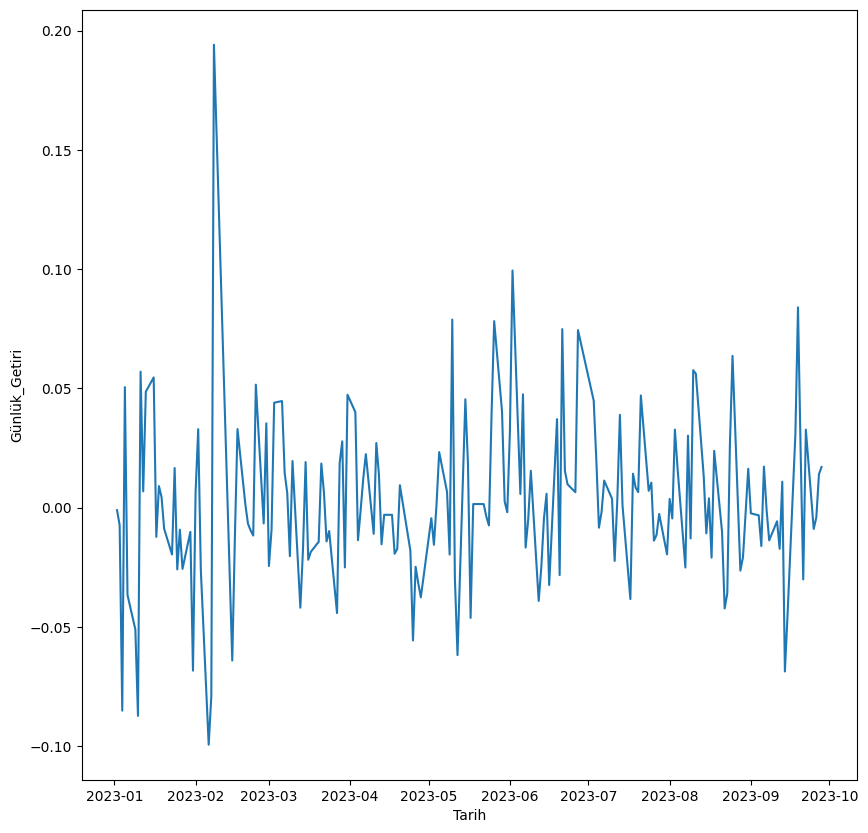

In [107]:
plt.figure(figsize=(10,10))

sns.lineplot(x=filtered_df["Tarih"],y=filtered_df["Günlük_Getiri"])
plt.show()

In [109]:
df.head()

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri
684,2021-01-04,21.12,21.48,21.52,21.08,"6,01M","-0,85%",21.00,-0.12,-0.005682
683,2021-01-05,21.00,20.98,21.26,20.62,"8,72M","-0,57%",20.88,-0.12,-0.005714
682,2021-01-06,20.88,21.14,21.18,20.78,"5,47M","-0,57%",20.88,0.00,0.000000
681,2021-01-07,20.88,20.96,21.10,20.72,"7,39M","0,00%",21.30,0.42,0.020115
680,2021-01-08,21.30,20.96,21.60,20.92,"13,12M","2,01%",21.28,-0.02,-0.000939


## Yön Kolonu Yaratma
* Değişim Kolonu Tarafından Belirlenir
* Değişim >0 ise yön yukarı yani=1
* Değişim <0 ise yön aşağı yani=-1

In [110]:
df["Yön"]=[1 if df.loc[i,"Değişim"]>0 else -1 for i in df.index]

In [111]:
df.head()

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri,Yön
684,2021-01-04,21.12,21.48,21.52,21.08,"6,01M","-0,85%",21.00,-0.12,-0.005682,-1
683,2021-01-05,21.00,20.98,21.26,20.62,"8,72M","-0,57%",20.88,-0.12,-0.005714,-1
682,2021-01-06,20.88,21.14,21.18,20.78,"5,47M","-0,57%",20.88,0.00,0.000000,-1
681,2021-01-07,20.88,20.96,21.10,20.72,"7,39M","0,00%",21.30,0.42,0.020115,1
680,2021-01-08,21.30,20.96,21.60,20.92,"13,12M","2,01%",21.28,-0.02,-0.000939,-1


## Hareketli Ortalama

Hareketli Ortalama (MA), belirli bir süre boyunca bir güvenliğin ortalama fiyatını gösteren fiyat tabanlı, gecikmeli (veya reaktif) bir göstergedir. Hareketli Ortalama, momentumu ölçmenin yanı sıra trendleri doğrulamanın ve destek ve direnç alanlarını tanımlamanın iyi bir yoludur.

## Kapanış Fiyatının hareketli Ortalamasını 3 Gün Boyunca Hesaplamak

In [112]:
df["MA3"]=(df["Kapanış"]+df["Kapanış"].shift(1)+df["Kapanış"].shift(2))/3

In [113]:
df.head(15)

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri,Yön,MA3
684,2021-01-04,21.12,21.48,21.52,21.08,"6,01M","-0,85%",21.00,-0.12,-0.005682,-1,NaN
683,2021-01-05,21.00,20.98,21.26,20.62,"8,72M","-0,57%",20.88,-0.12,-0.005714,-1,NaN
682,2021-01-06,20.88,21.14,21.18,20.78,"5,47M","-0,57%",20.88,0.00,0.000000,-1,21.000000
681,2021-01-07,20.88,20.96,21.10,20.72,"7,39M","0,00%",21.30,0.42,0.020115,1,20.920000
680,2021-01-08,21.30,20.96,21.60,20.92,"13,12M","2,01%",21.28,-0.02,-0.000939,-1,21.020000
679,2021-01-11,21.28,21.30,21.76,20.88,"8,76M","-0,09%",21.94,0.66,0.031015,1,21.153333
678,2021-01-12,21.94,21.36,22.10,21.36,"14,54M","3,10%",22.18,0.24,0.010939,1,21.506667
677,2021-01-13,22.18,22.30,22.46,21.72,"11,02M","1,09%",22.74,0.56,0.025248,1,21.800000
676,2021-01-14,22.74,22.60,22.90,22.34,"15,56M","2,52%",22.40,-0.34,-0.014952,-1,22.286667
675,2021-01-15,22.40,22.58,22.78,22.20,"10,49M","-1,50%",23.40,1.00,0.044643,1,22.440000


## 40 ve 200 günlük Hareketli Ortalamalar Hesaplama

In [116]:
df["Ma40"]=df["Kapanış"].rolling(40).mean()
df["Ma200"]=df["Kapanış"].rolling(200).mean()

In [119]:
df.tail()

,Tarih,Kapanış,Açılış,Yüksek,Düşük,Hac.,Fark %,Yarın_Kapanış_Fiyat,Değişim,Günlük_Getiri,Yön,MA3,Ma40,Ma200
4,2023-09-25,123.1,119.3,124.3,117.1,"9,17M","3,27%",122.0,-1.1,-0.008936,-1,121.733333,120.3600,91.71575
3,2023-09-26,122.0,123.9,124.9,121.0,"6,67M","-0,89%",121.5,-0.5,-0.004098,-1,121.433333,120.6025,91.88625
2,2023-09-27,121.5,123.5,125.2,121.1,"5,74M","-0,41%",123.2,1.7,0.013992,1,122.200000,120.8875,92.06375
1,2023-09-28,123.2,121.4,126.4,120.8,"8,85M","1,40%",125.3,2.1,0.017045,1,122.233333,121.2050,92.24850
0,2023-09-29,125.3,123.8,126.1,122.3,"10,27M","1,70%",NaN,NaN,NaN,-1,123.333333,121.5875,92.44450


## MA Görselleştirilmesi

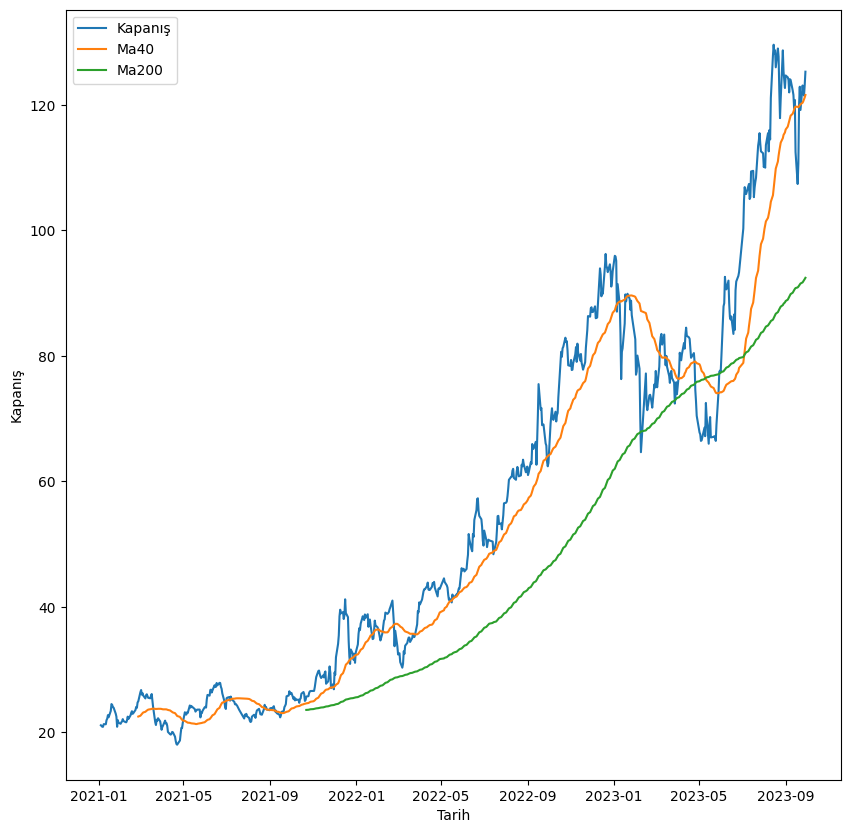

In [133]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df["Tarih"],y=df["Kapanış"],label="Kapanış")
sns.lineplot(x=df["Tarih"],y=df["Ma40"],label="Ma40")
sns.lineplot(x=df["Tarih"],y=df["Ma200"],label="Ma200")
plt.legend()
plt.show()

#SONUÇ

Eğer Ma40>Ma200 ise hisse senedi fiyatı bir süre yukarı doğru hareket eder